In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('../data/bostonhousing.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the column names
print("Column names in the dataset:")
print(data.columns)



First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Column names in the dataset:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


### Identify missing values and outliers.

In [16]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### Outliers Dection 

Number of outliers in crim: 66
Number of outliers in zn: 68
Number of outliers in indus: 0
Number of outliers in chas: 35
Number of outliers in nox: 0
Number of outliers in rm: 30
Number of outliers in age: 0
Number of outliers in dis: 5
Number of outliers in rad: 0
Number of outliers in tax: 0
Number of outliers in ptratio: 15
Number of outliers in b: 77
Number of outliers in lstat: 7
Number of outliers in medv: 40


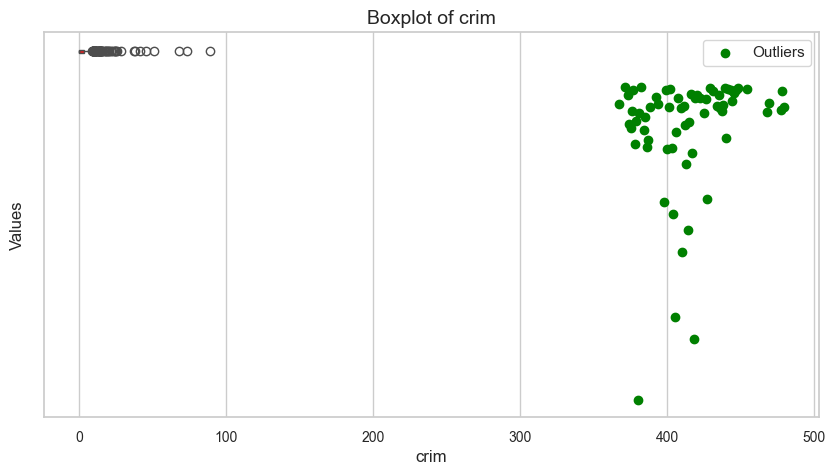

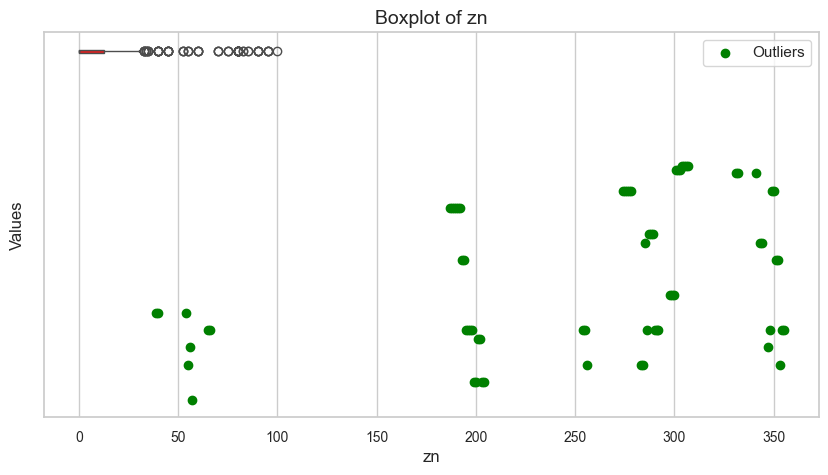

/var/folders/4c/dyp8n3l12y7_ntb9980lhbl00000gn/T/ipykernel_5897/3671367411.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


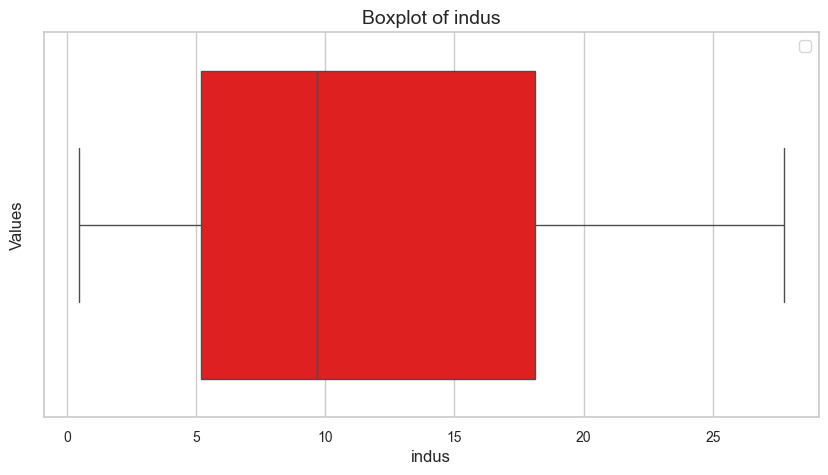

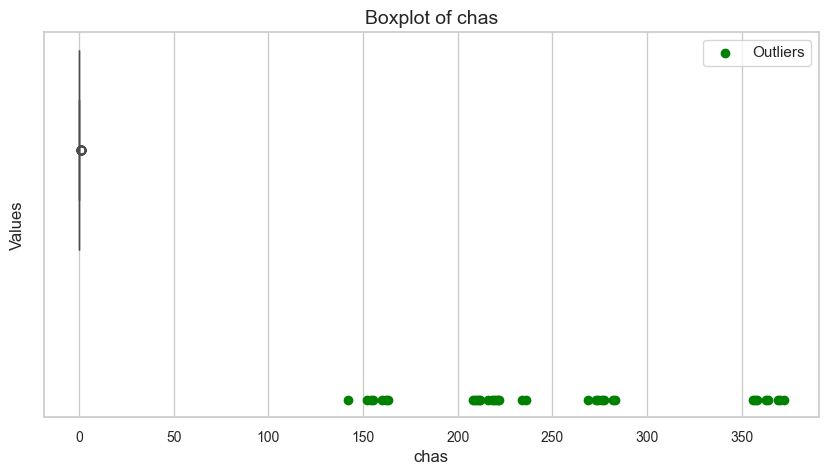

/var/folders/4c/dyp8n3l12y7_ntb9980lhbl00000gn/T/ipykernel_5897/3671367411.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


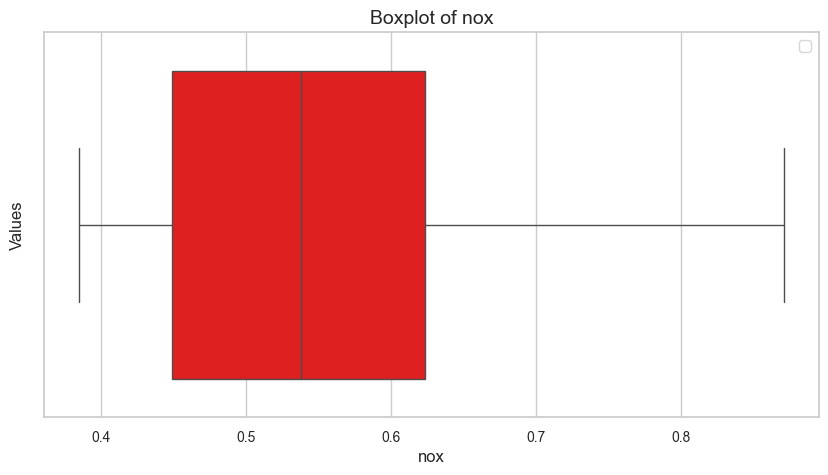

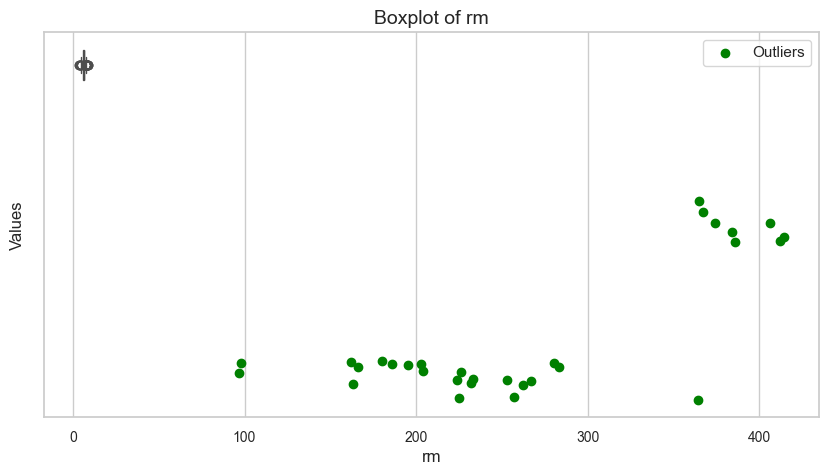

/var/folders/4c/dyp8n3l12y7_ntb9980lhbl00000gn/T/ipykernel_5897/3671367411.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


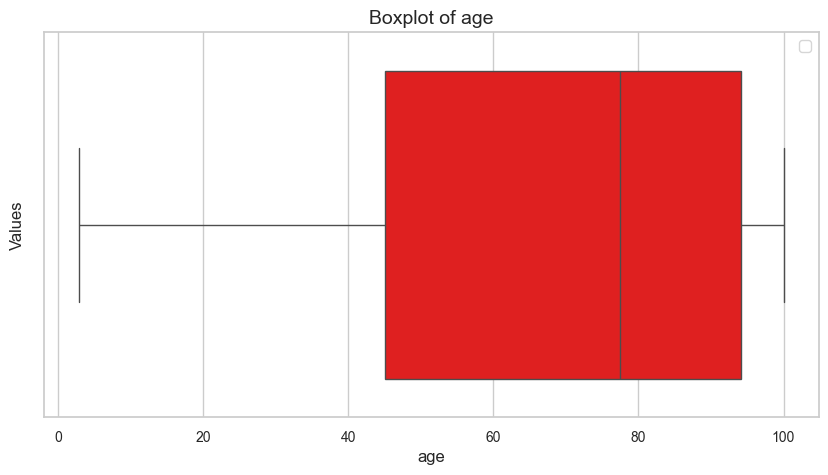

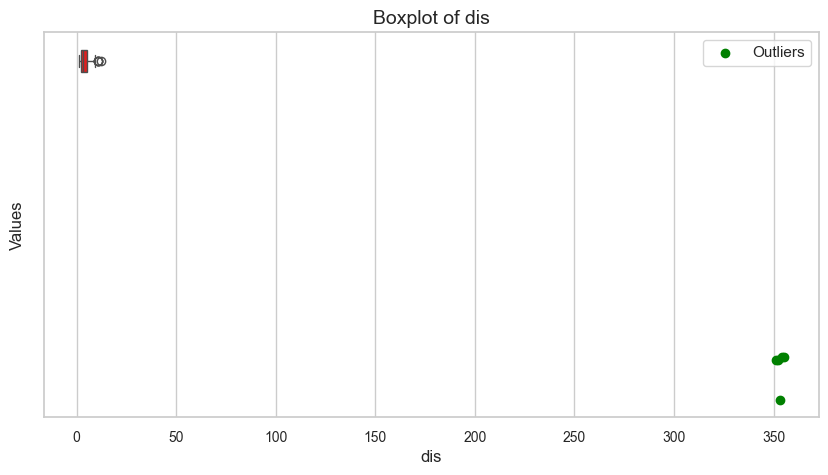

/var/folders/4c/dyp8n3l12y7_ntb9980lhbl00000gn/T/ipykernel_5897/3671367411.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


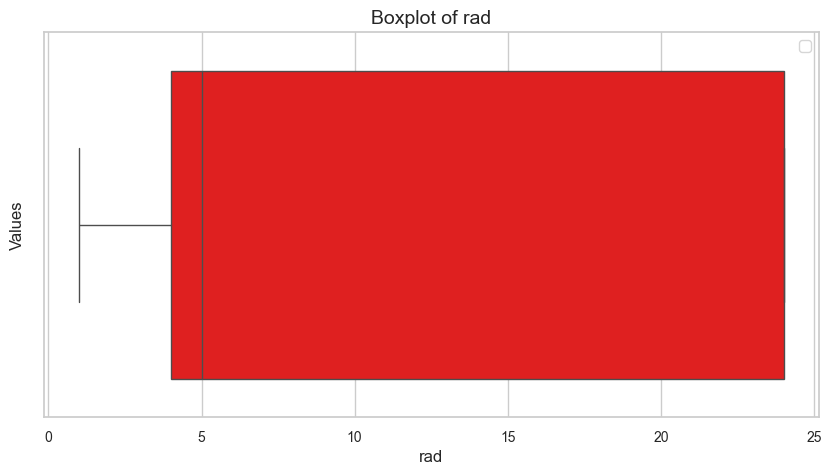

/var/folders/4c/dyp8n3l12y7_ntb9980lhbl00000gn/T/ipykernel_5897/3671367411.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


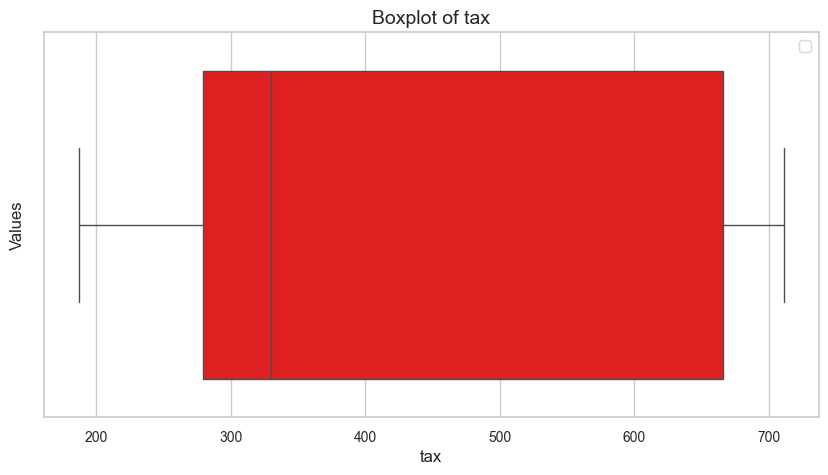

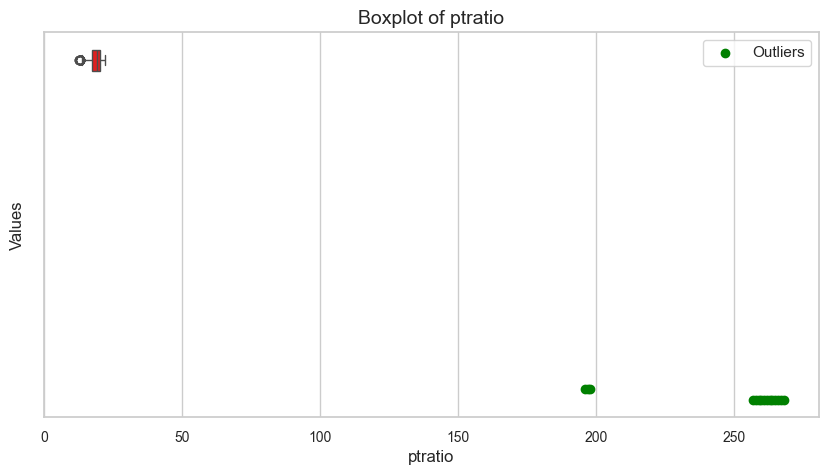

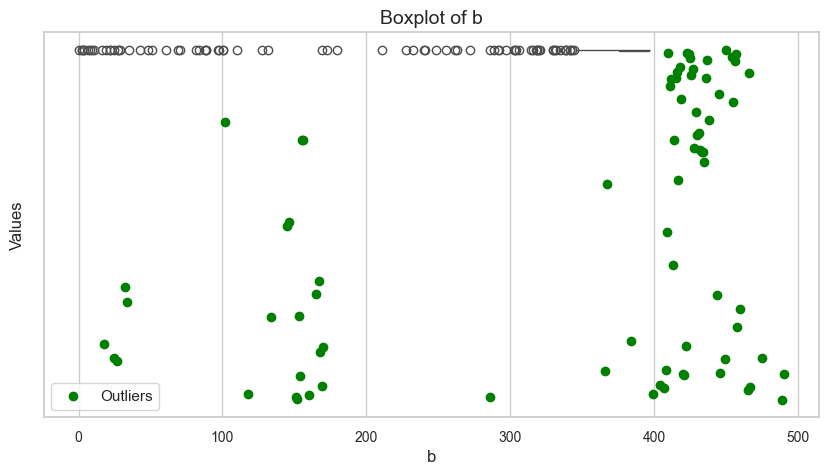

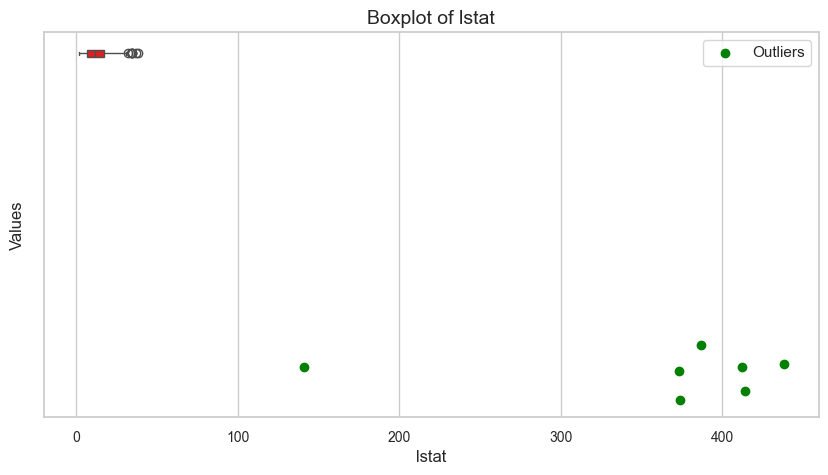

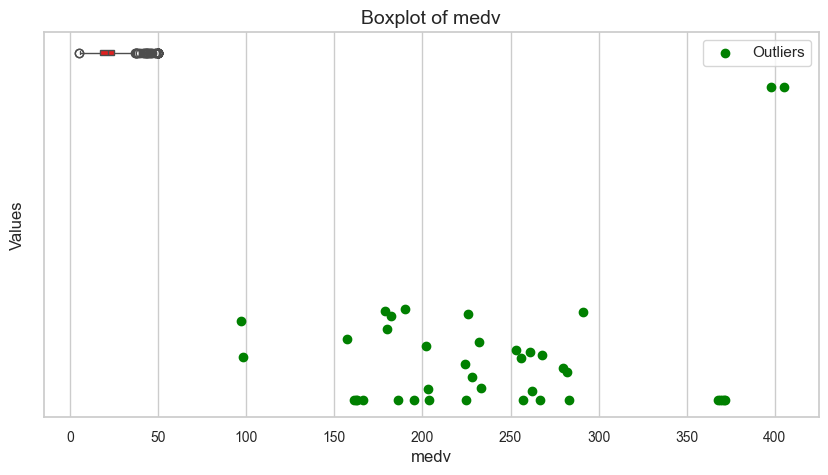

In [10]:

# List of features to check for outliers
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

# Function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for each feature
outliers_info = {}
for feature in features:
    outliers = detect_outliers(data, feature)
    outliers_info[feature] = outliers
    print(f"Number of outliers in {feature}: {len(outliers)}")

# Visualize outliers using boxplots with red and green combination
for feature in features:
    plt.figure(figsize=(10, 5))
    
    # Create the boxplot with red color
    sns.boxplot(x=data[feature], color="red")
    
    # Identify and plot outliers with green color
    outliers = detect_outliers(data, feature)
    if not outliers.empty:
        plt.scatter(outliers.index, outliers[feature], color="green", label="Outliers")
    
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

### Explore the Data Structure, Types, and Summary Statistics

In [ ]:
# Display the data structure
print("\nData structure:")
print(data.info())

# Display summary statistics
print("\nSummary statistics:")
print(data.describe())

# Display data types
print("\nData types:")
print(data.dtypes)



Data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Summary statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636 

In [15]:
#Summary Statistics
data.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Visualize Relationships Between Features and the Target Variable

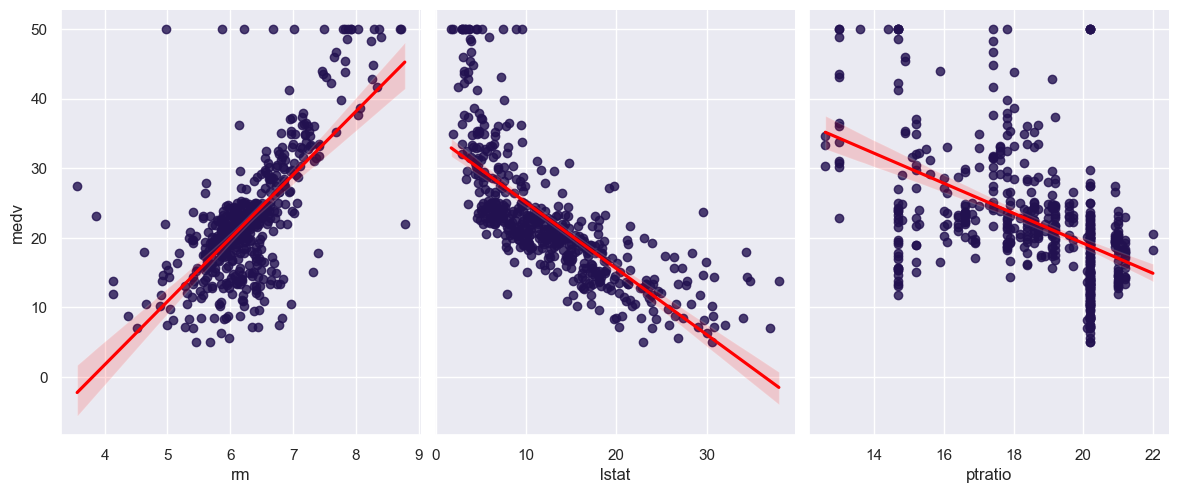

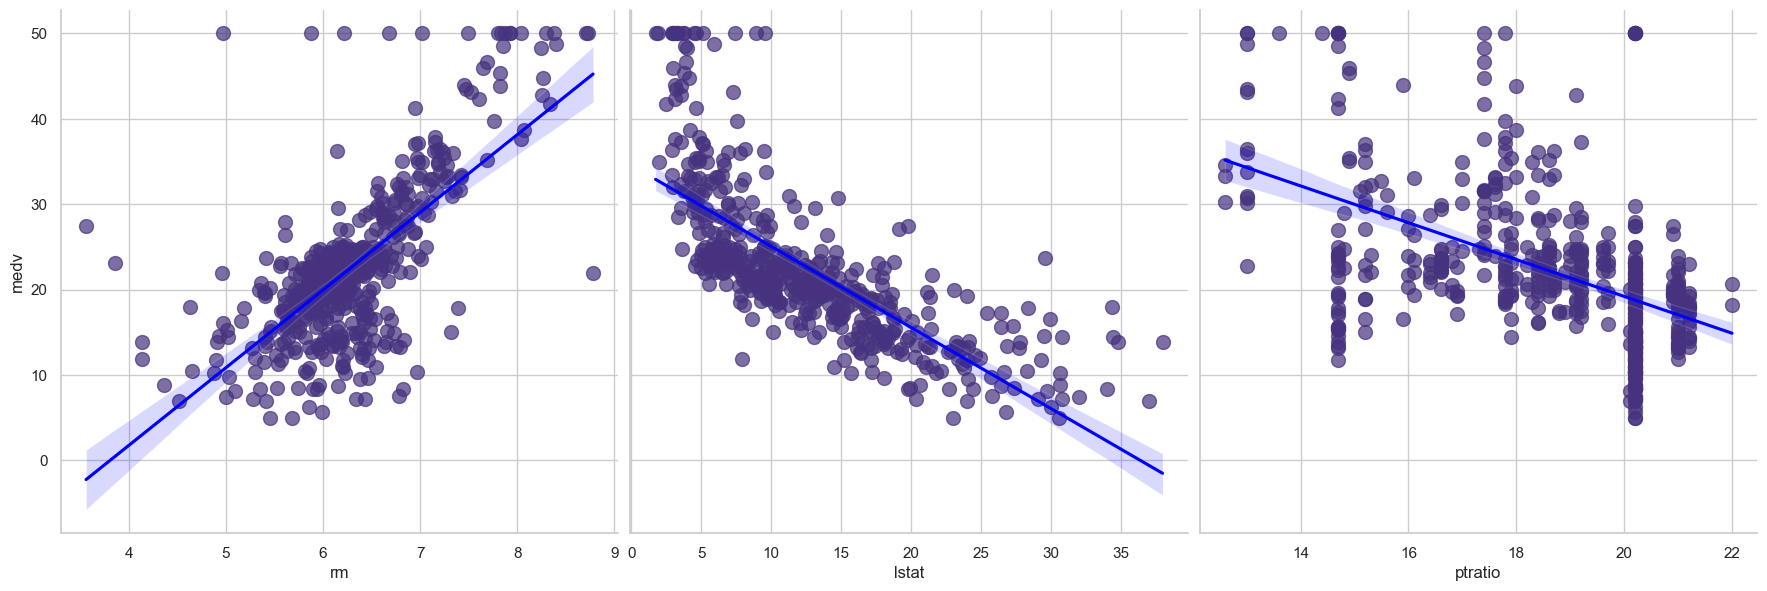

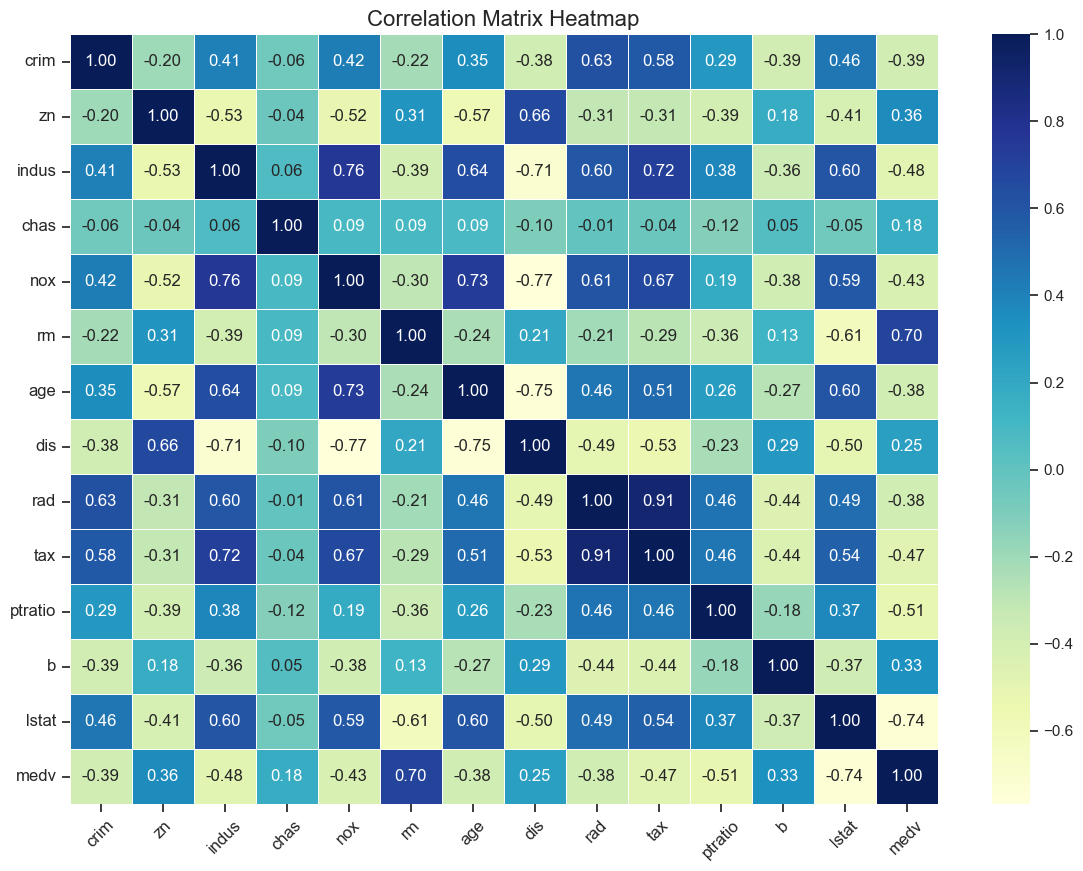

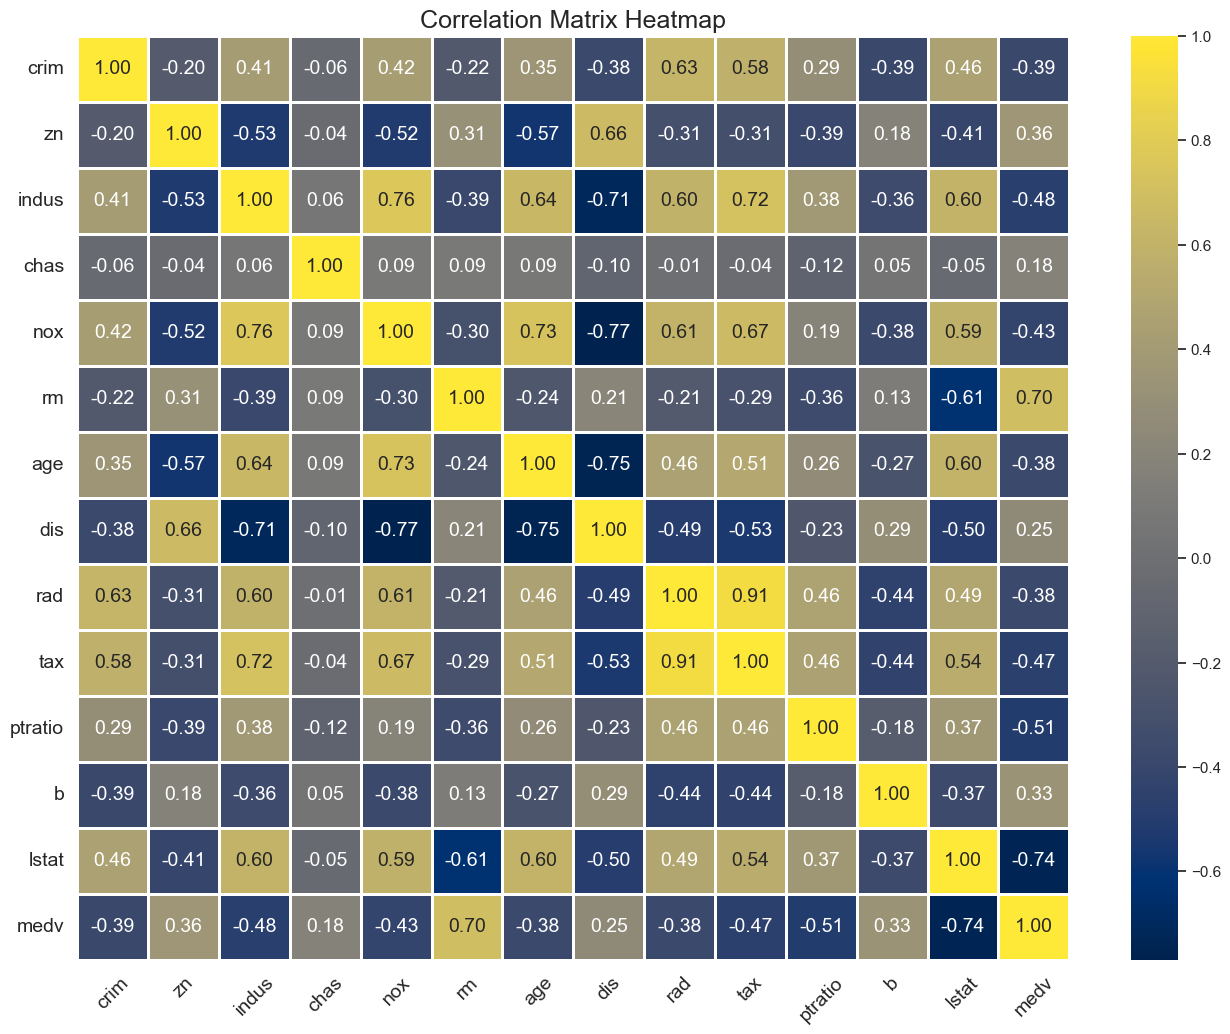

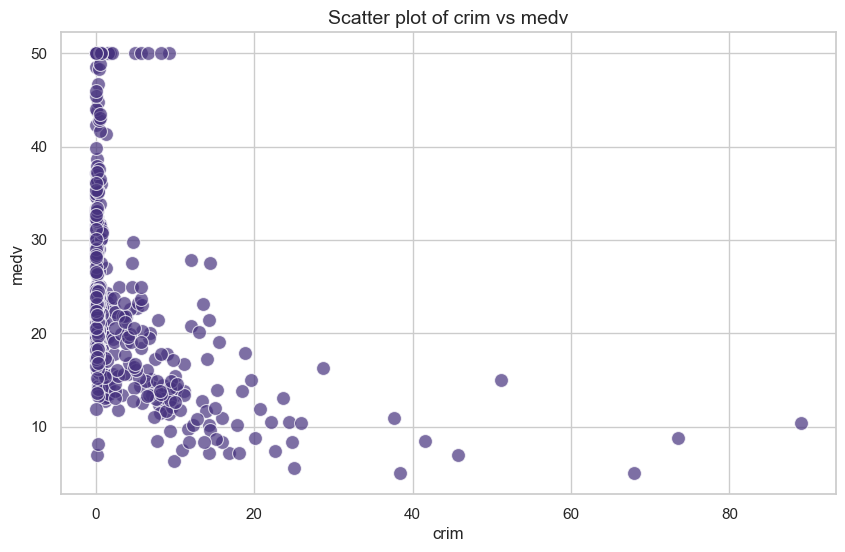

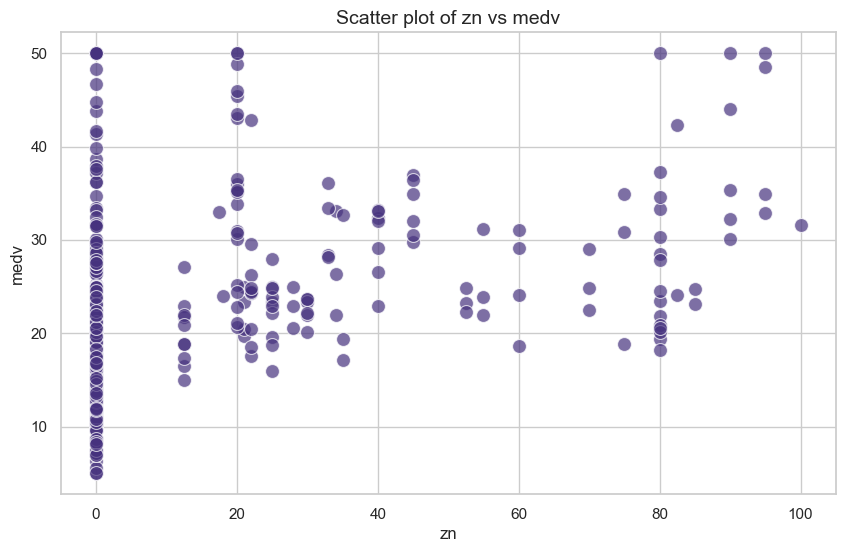

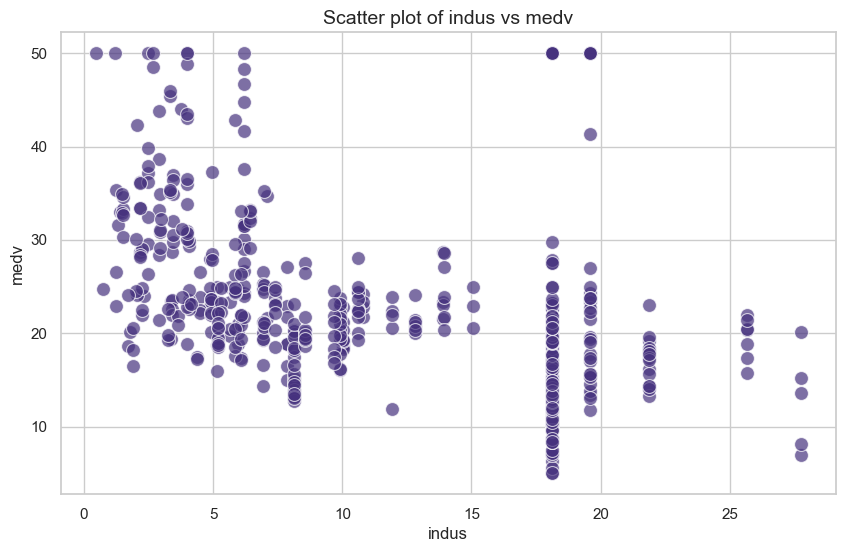

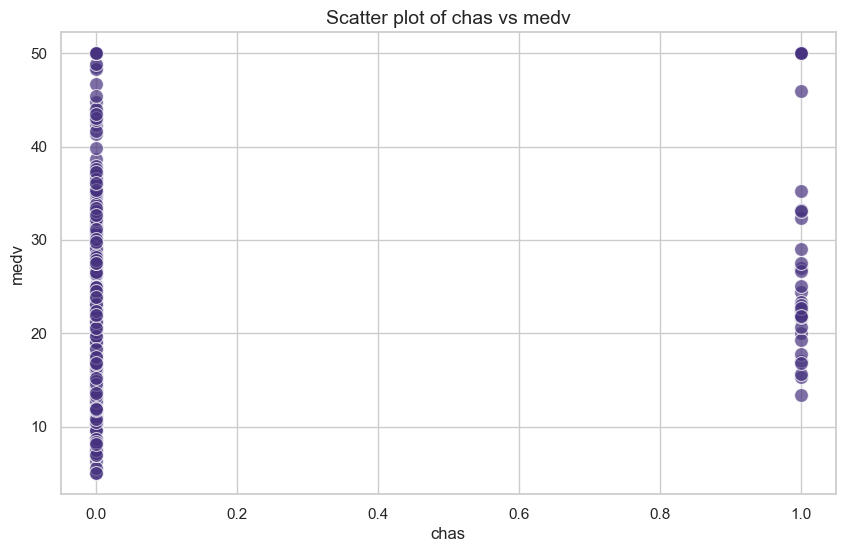

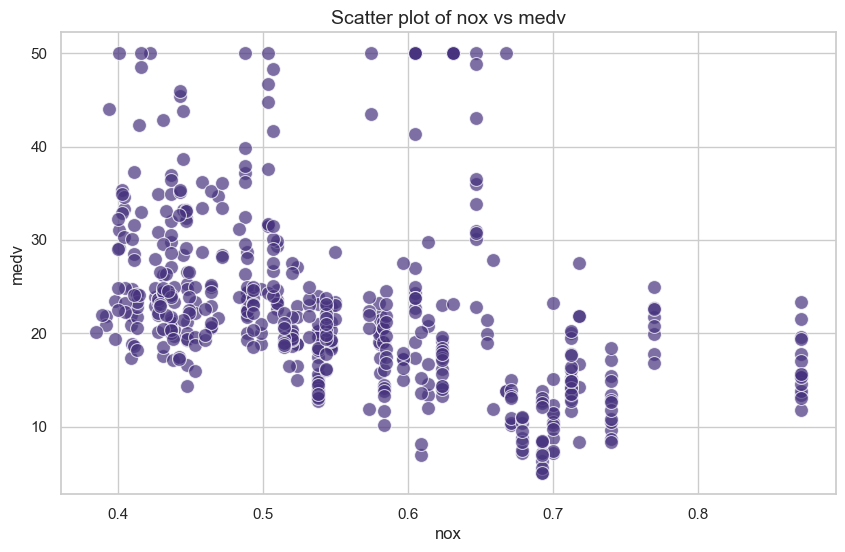

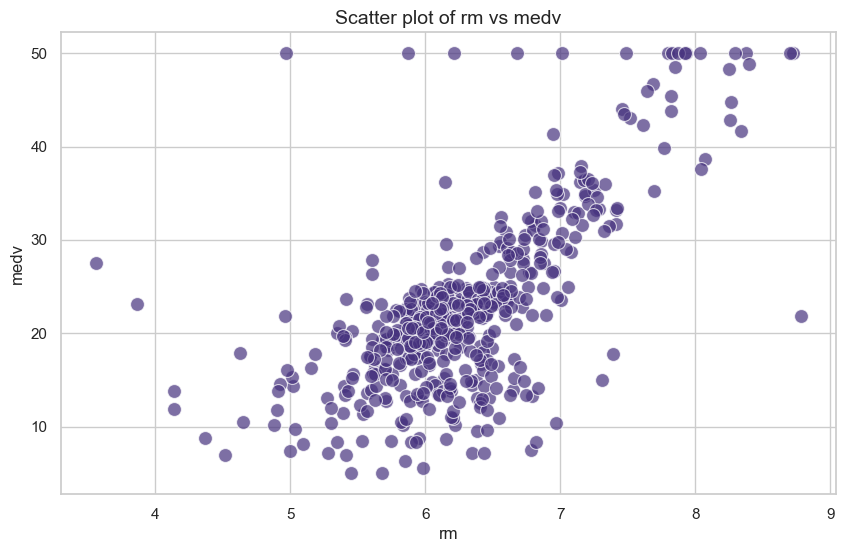

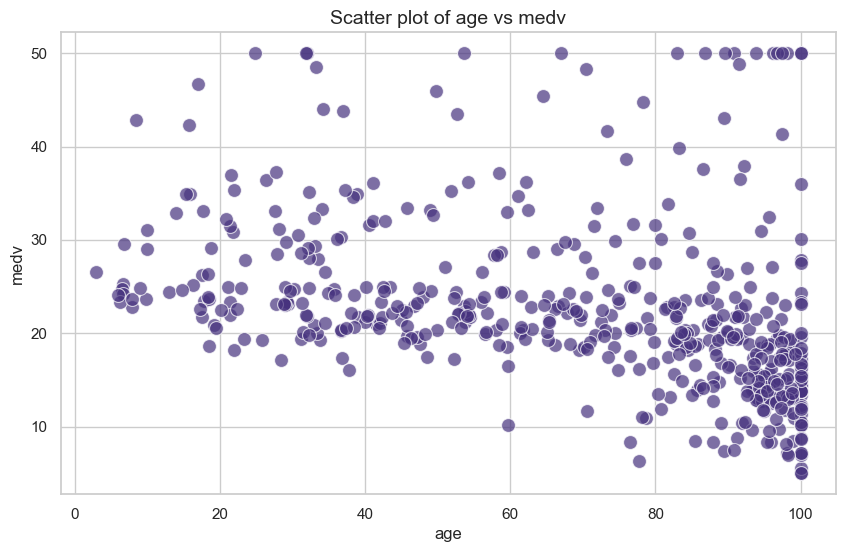

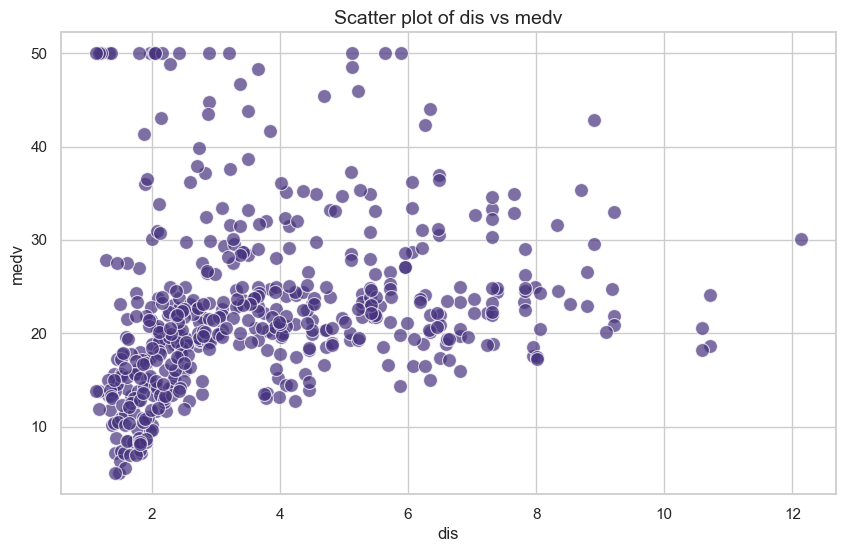

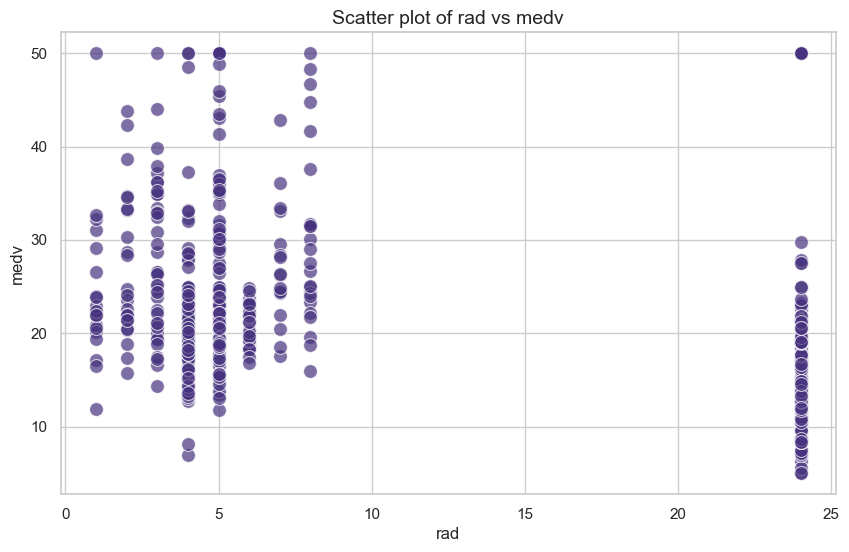

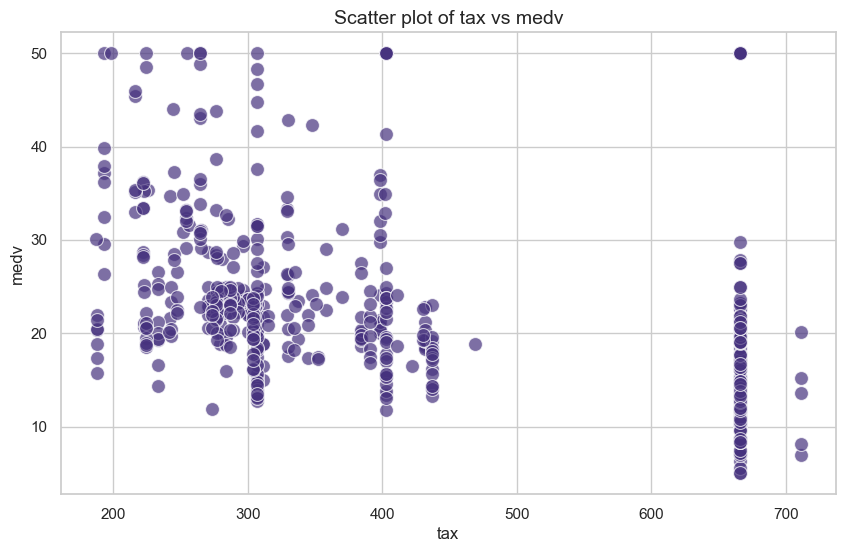

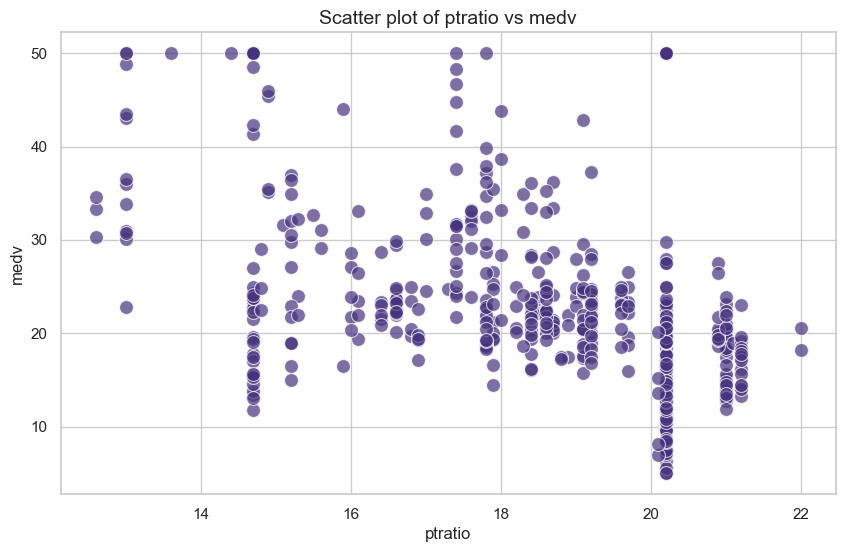

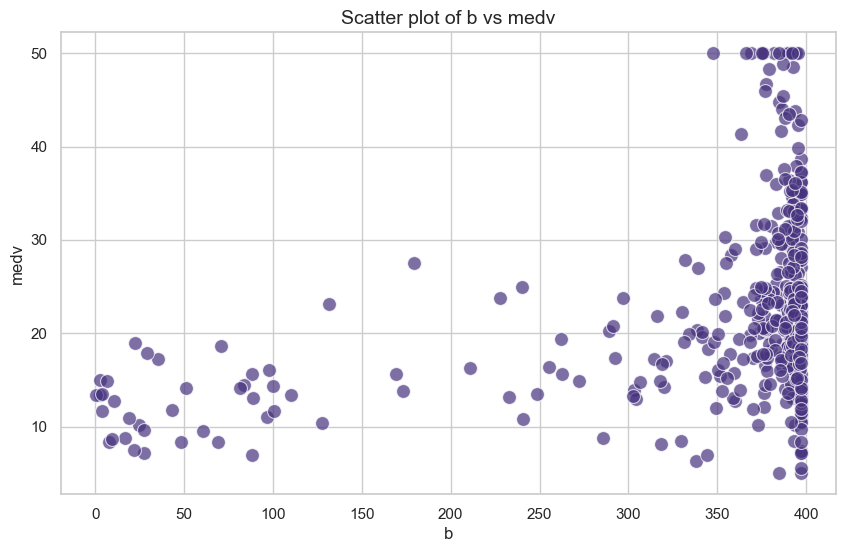

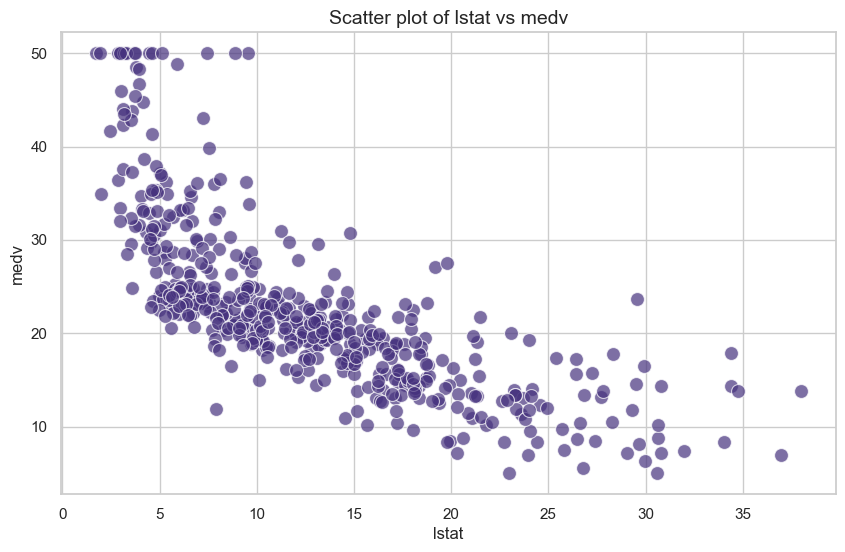

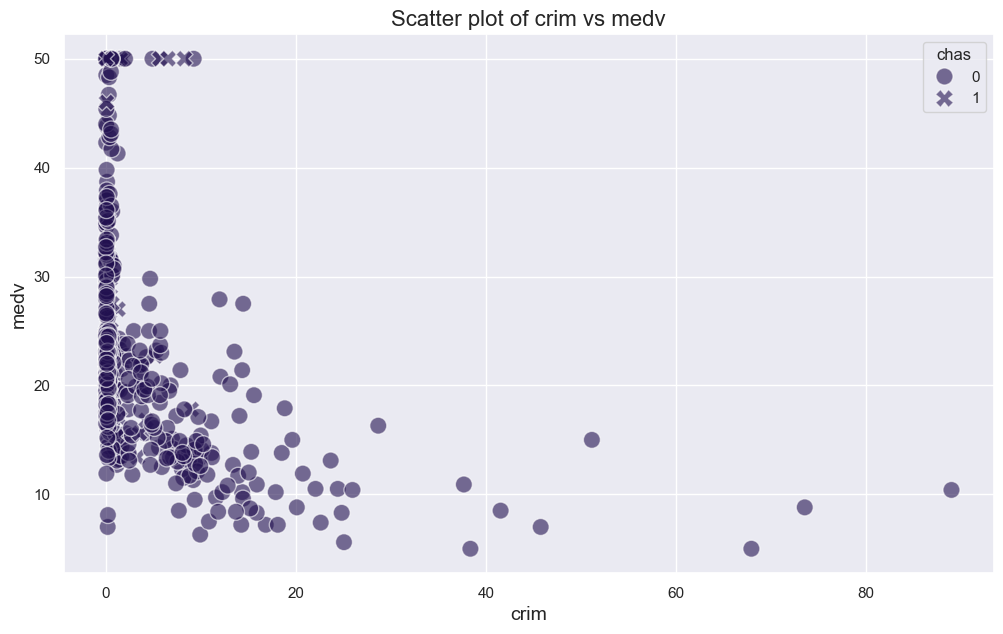

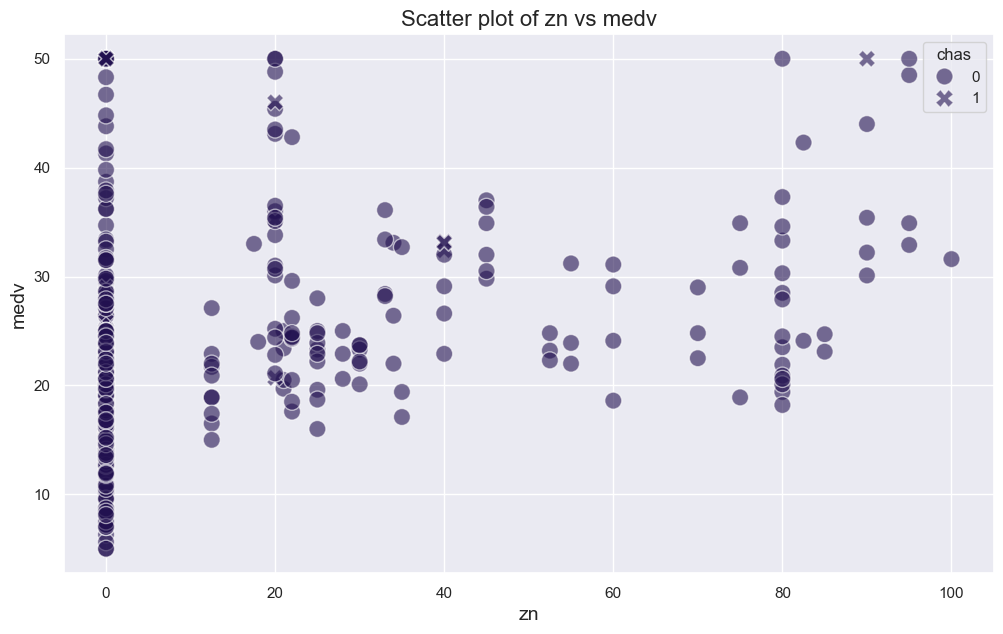

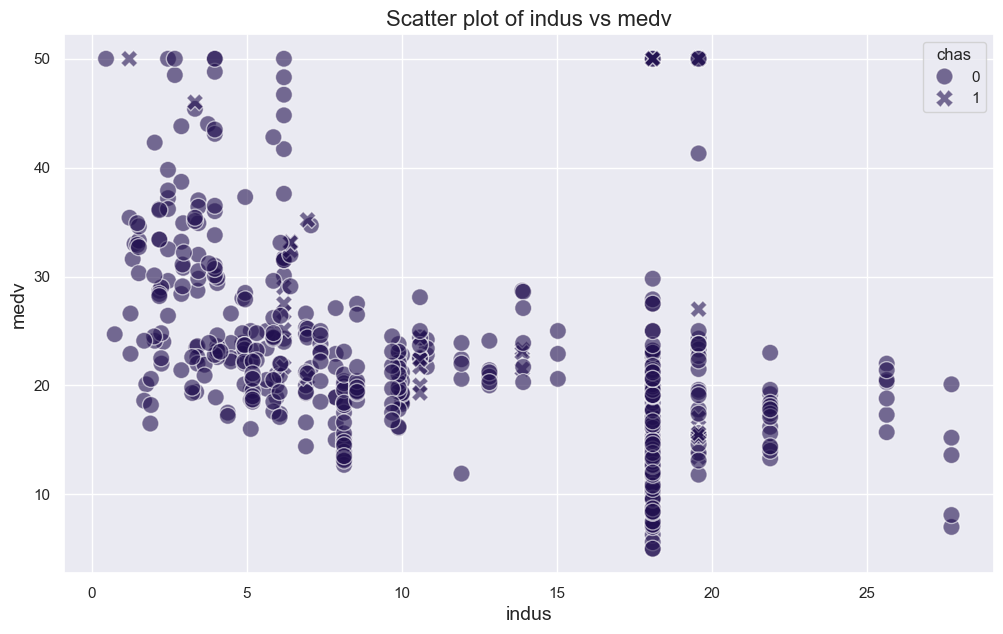

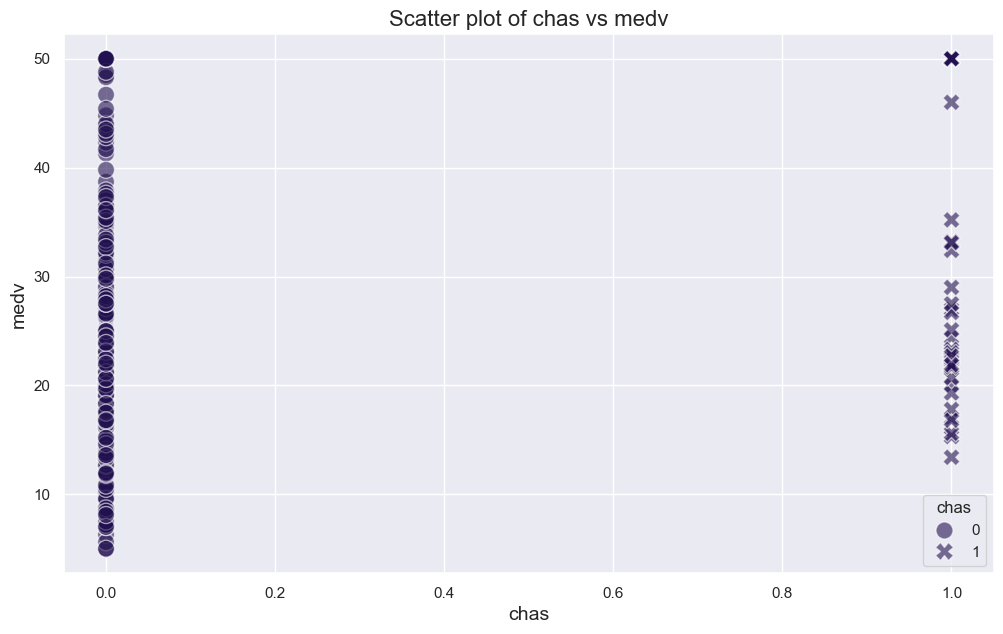

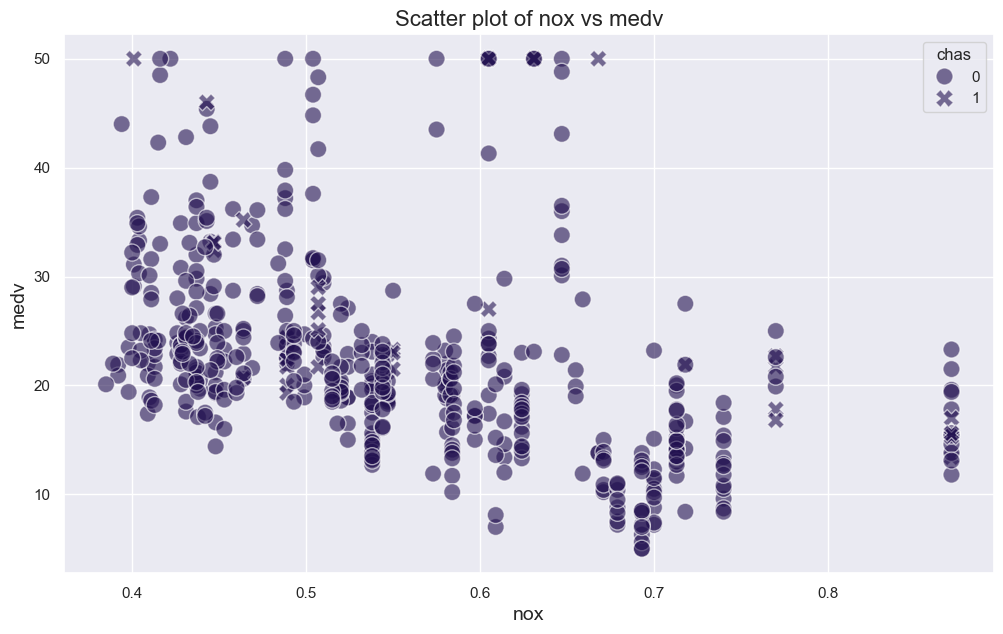

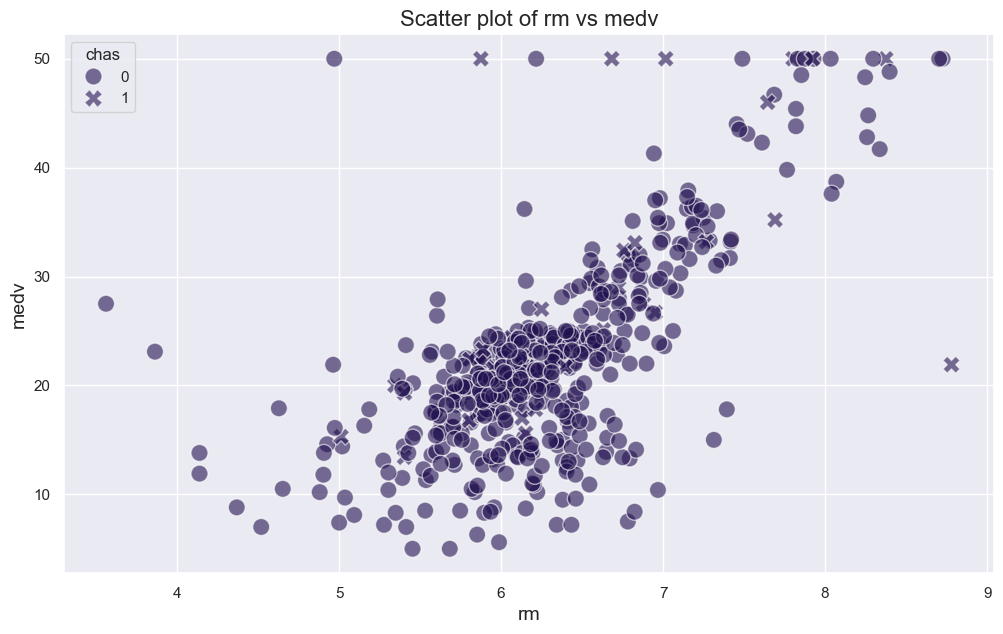

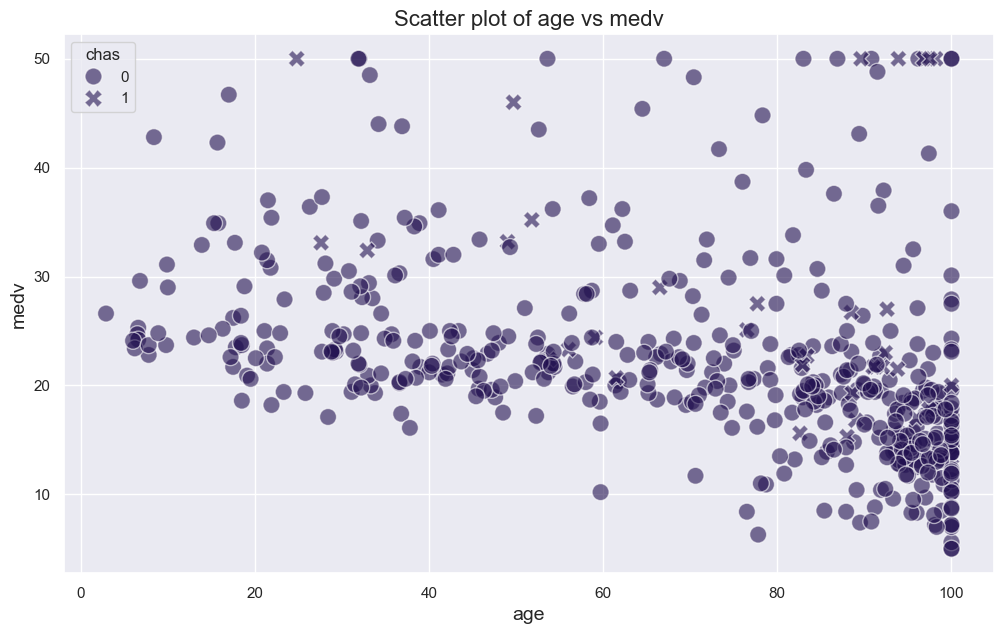

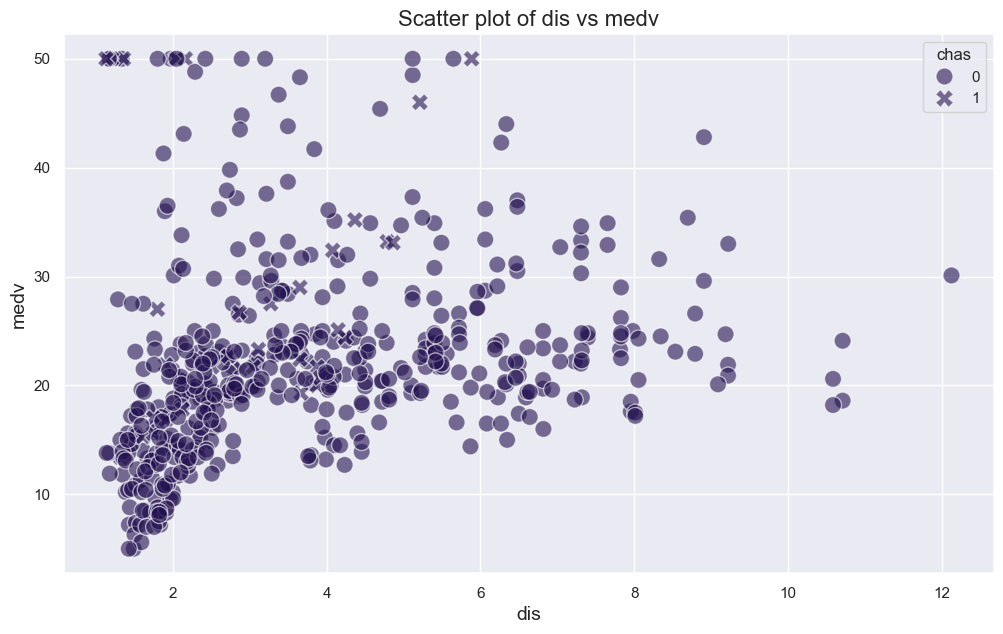

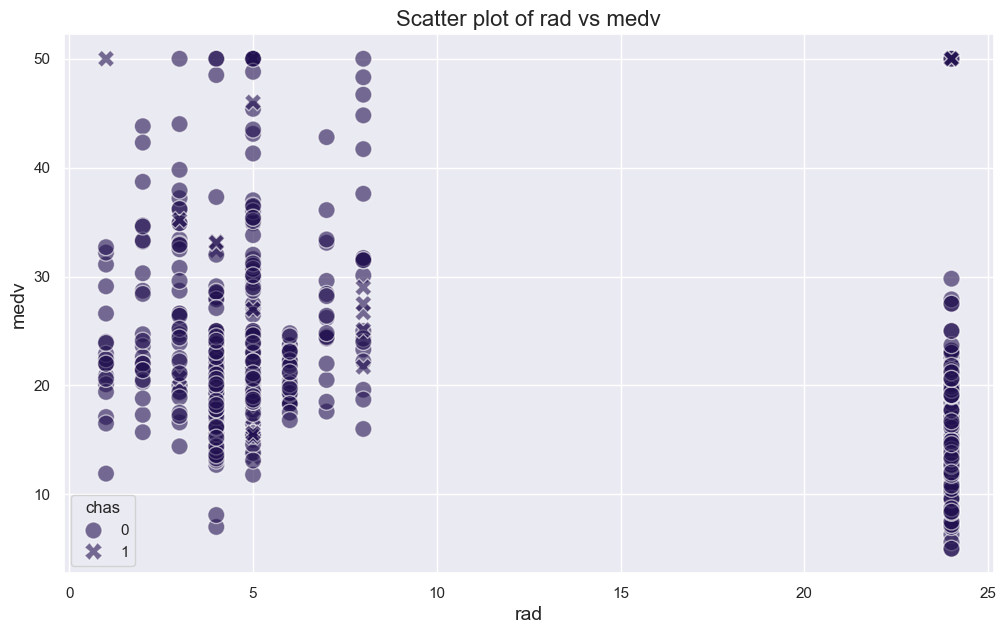

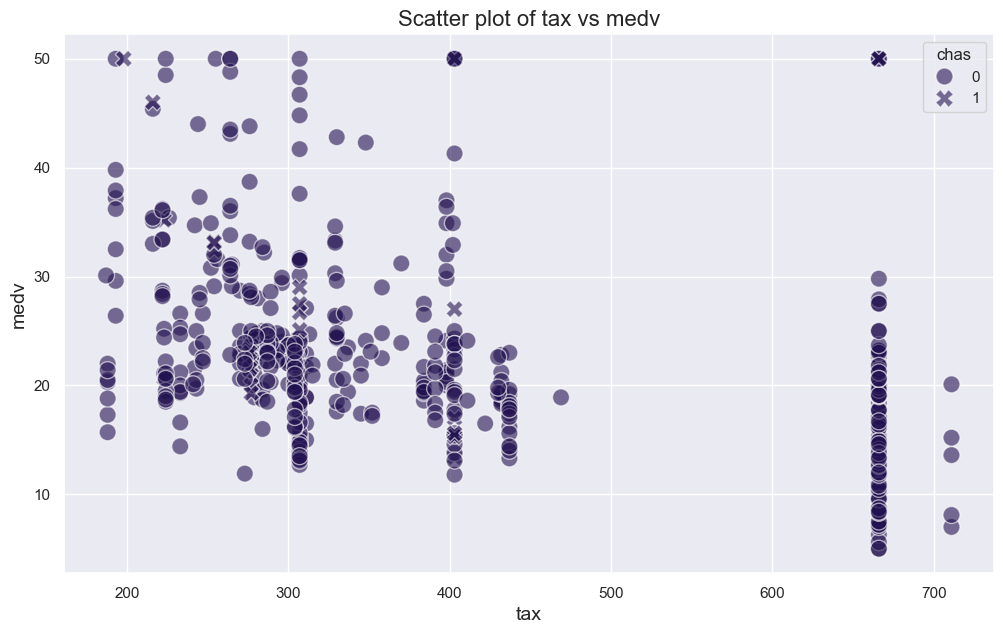

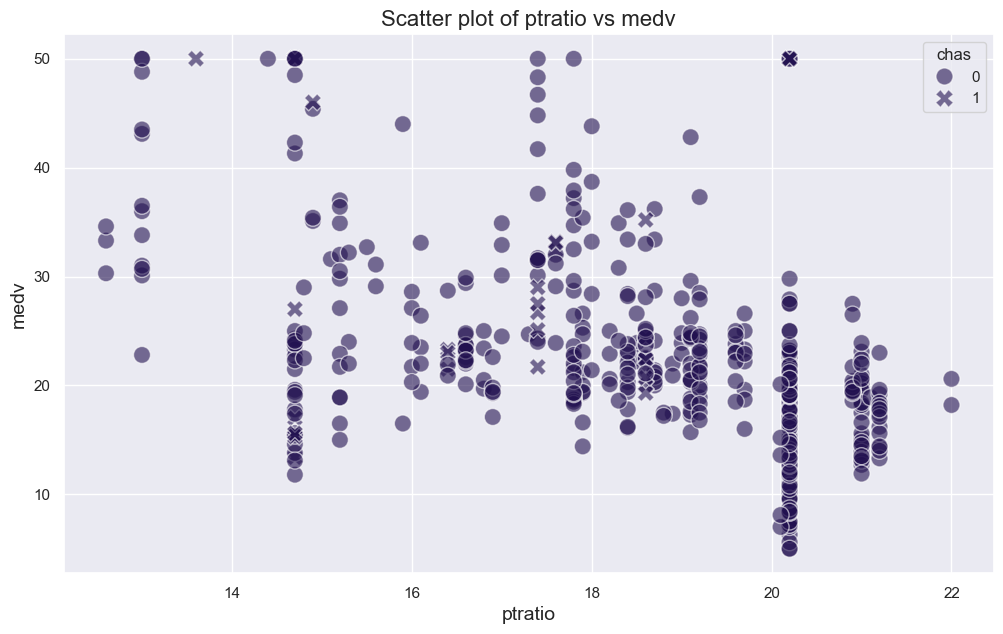

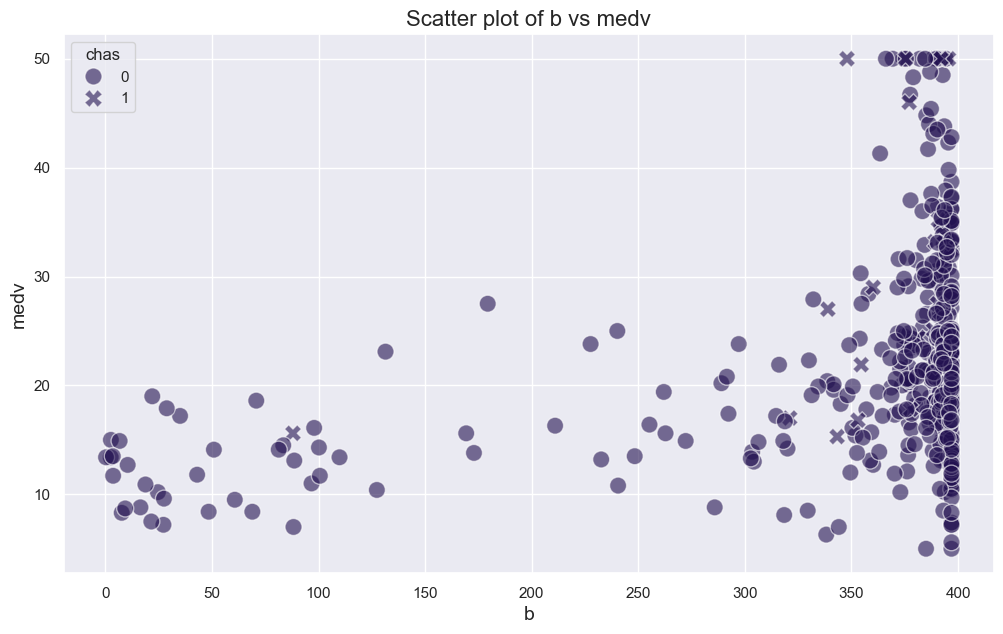

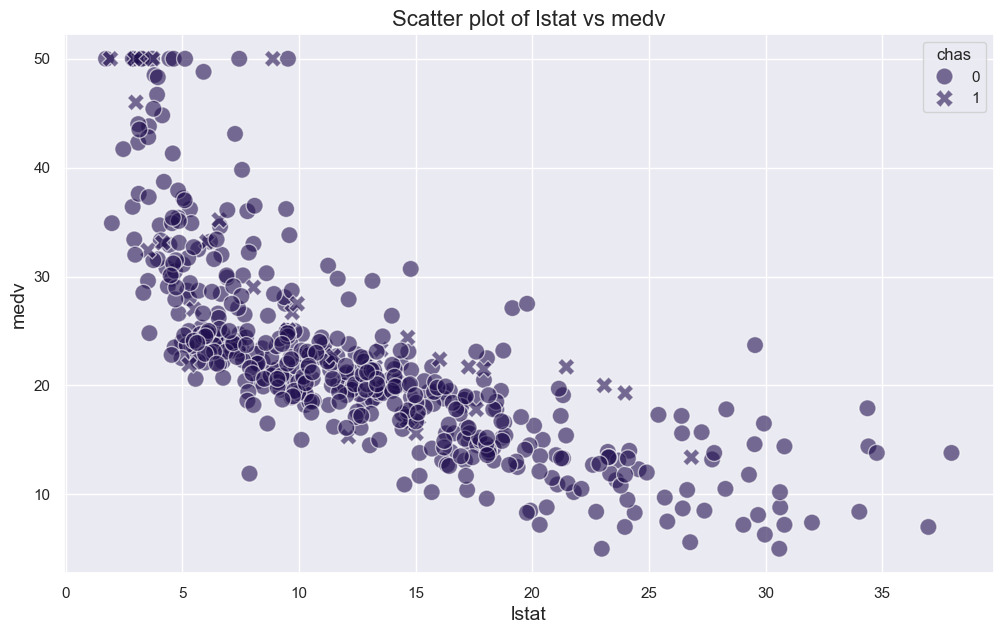

In [10]:
# List of features to visualize
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Custom style with different colors and markers for pairplot
sns.set(style="darkgrid", palette="magma")

sns.pairplot(data, x_vars=['rm', 'lstat', 'ptratio'], y_vars='medv', height=5, aspect=0.8, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Custom style with different sizes and alpha for pairplot
sns.set(style="whitegrid", palette="viridis")

sns.pairplot(data, x_vars=['rm', 'lstat', 'ptratio'], y_vars='medv', height=6, aspect=1.0, kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws':{'s':100, 'alpha':0.7}})
plt.show()

# Custom style with different colors and annotations for heatmap
sns.set(style="ticks", palette="Spectral")

plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Custom style with different sizes and line widths for heatmap
sns.set(style="darkgrid", palette="cividis")

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=.8, annot_kws={"size": 14})
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.show()

# Custom style with different colors and sizes for scatter plots
sns.set(style="whitegrid", palette="viridis")

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='medv', data=data, s=100, alpha=0.7)
    plt.title(f'Scatter plot of {feature} vs medv', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('medv', fontsize=12)
    plt.show()

# Custom style with different patterns and alpha for scatter plots
sns.set(style="darkgrid", palette="magma")

for feature in features:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=feature, y='medv', data=data, style='chas', markers=True, s=150, alpha=0.6)
    plt.title(f'Scatter plot of {feature} vs medv', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('medv', fontsize=14)
    plt.show()